## Prompt in Generative AI
Prompts are the input instructions or queries given t a model to guide its output.

**2 Types of prompts.**

Text Based Prompt : Text Input


Multi modal prompts : Text + Image/Audio Input



## Static Vs Dynamic Prompt

Static Prompt - A static prompt is a fixed prompt that does not change across requests. It is usually predefined and reused as-is whenever sending a query to the model.

Dynamic Prompt - A dynamic prompt changes based on user input, external context, retrieved data, or runtime variables. It is often templated and filled with values dynamically.


In [3]:
import os
from getpass import getpass

os.environ["OPENAI_API_KEY"] = getpass("Enter your OpenAI API key: ")

Enter your OpenAI API key: ··········


In [4]:
%%capture output
pip install langchain_openai

In [5]:
from langchain_openai import ChatOpenAI

## Static Prompt Example

In [6]:
llm = ChatOpenAI(model='gpt-4')
static_prompt = "Explain the concept of Machine Learning"
result = llm.invoke(static_prompt)
print(result.content)

Machine Learning is a subfield of artificial intelligence (AI) that focuses on the development of algorithms and statistical models that enable computers to perform tasks without explicit programming. Instead, these systems are designed to learn and improve over time by being exposed to new data.

The concept of Machine Learning is based on the idea that systems can learn from data, identify patterns, and make decisions with minimal human intervention. It's employed in a range of computing tasks where designing and programming explicit algorithms is infeasible. 

There are two main types of Machine Learning: Supervised Learning, where the machine is taught by example and Unsupervised Learning, where the machine learns patterns and relationships from raw data. There's also Reinforcement Learning, which involves machines learning to make specific decisions by trial and error, receiving rewards or penalties for actions taken. 

Applications of Machine Learning are vast and varied, includi

## Dynamic Prompt Example


In [7]:
topic = input('Please Enter your topic on which you need an overview')

Please Enter your topic on which you need an overviewMachine Learning


In [8]:
dynamic_prompt = f"Explain the concept of {topic}"
print('Prompt = ', dynamic_prompt)
result = llm.invoke(dynamic_prompt)
print(result.content)

Prompt =  Explain the concept of Machine Learning
Machine learning is a field of artificial intelligence (AI) that uses statistical techniques to enable computer systems to learn from data, identify patterns, and make decisions or predictions without explicit programming. In other words, machines improve their performance on a specific task over time with more data and experience.

There are three main types of machine learning:

1. Supervised Learning: The algorithm learns from labeled data. It is given a set of examples with the correct answers (labels), and it uses this information to predict the labels of new data.

2. Unsupervised Learning: The algorithm learns from unlabeled data and is used to detect patterns or anomalies.

3. Reinforcement Learning: The algorithm learns by interacting with an environment, receiving rewards for correct actions and penalties for incorrect ones, to guide the learning process.

Machine learning can be applied in numerous areas, such as personalized

## Prompt Template

A PromptTemplate in LangChain is a structured way to create prompts dynamically by inserting variables into a predefined template. Instead of hardcoding prompts, PromptTemplate allows you to define placeholders that can be filled in at runtime with different inputs.

This makes it reusable, flexible and easy to manage, especially when wokring with dynamic user inputs or automated workflows.

**Why use PromptTemplate over f-strings?**

1. Default validation
2. Reusable -> You can save the template in JSON and resuse it
3. LangChain Ecosystem -> PromptTemplates are tied tightly to the LangChain Ecosystem


In [13]:
from langchain_core.prompts import PromptTemplate
from ipywidgets import Dropdown, interactive

In [14]:
# Dropdowns
paper_input = Dropdown(
    options=[
        "Attention is all you need",
        "BERT: Pre-training of Deep Bidirectional Transformers",
        "GPT-3: Language Models are Few-Shot Learners",
        "RoBERTa: A Robustly Optimized BERT Pretraining Approach"
    ],
    description='Research Paper:'
)

style_input = Dropdown(
    options=["Beginner-Friendly", "Technical", "Code-Oriented", "Mathematical"],
    description='Style:'
)

length_input = Dropdown(
    options=["Concise", "Detailed", "In-Depth"],
    description='Length:'
)

# Display dropdowns
display(paper_input, style_input, length_input)


Dropdown(description='Research Paper:', options=('Attention is all you need', 'BERT: Pre-training of Deep Bidi…

Dropdown(description='Style:', options=('Beginner-Friendly', 'Technical', 'Code-Oriented', 'Mathematical'), va…

Dropdown(description='Length:', options=('Concise', 'Detailed', 'In-Depth'), value='Concise')

In [15]:
# Template
template = PromptTemplate(
    template="Summarize the research paper '{paper_input}' in a {style_input} style with a {length_input} response.",
    input_variables=["paper_input", "style_input", "length_input"]
)

In [16]:
# Fill the placeholders
prompt = template.invoke({
    "paper_input": paper_input.value,
    "style_input": style_input.value,
    "length_input": length_input.value
})

In [17]:
print('Prompt = ', prompt)
result = llm.invoke(prompt)
print('Result = ')
print(result.content)

Prompt =  text="Summarize the research paper 'Attention is all you need' in a Beginner-Friendly style with a Concise response."
Result = 
In the research paper ‘Attention is all you need’, the authors introduce a model called the "Transformer". Instead of using traditional models for processing language, which read the data sequentially (like how we read a sentence word by word), the Transformer pays attention to different words differently. This is done through a mechanism known as "Self-Attention", which gives more importance to words that are more relevant in understanding the sentence.

This model proves to be very efficient and performs much faster than traditional models. It also requires less computational resources, making it beneficial for large scale applications. 

In short, the paper transformed the way machines understand language, making them quicker, smarter and resource-efficient.


In [18]:
# Validate Template using PromptTemplate in LangChain
template_v2 = PromptTemplate(
    template="Summarize the research paper '{paper_input}' in a {style_input} style with a {length_input} response.",
    input_variables=["paper_input", "style_input", "length_input"],
    validate_template=True
)



In [19]:
# Fill the placeholders -> Now will only 2 values
prompt_v2 = template.invoke({
    "paper_input": paper_input.value,
    "style_input": style_input.value

})

result_v2 = llm.invoke(prompt_v2)
print(result_v2.content)

KeyError: "Input to PromptTemplate is missing variables {'length_input'}.  Expected: ['length_input', 'paper_input', 'style_input'] Received: ['paper_input', 'style_input']\nNote: if you intended {length_input} to be part of the string and not a variable, please escape it with double curly braces like: '{{length_input}}'.\nFor troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/INVALID_PROMPT_INPUT "

Missing Variable Error popping up, as we are validating the Input and we have intentionally passed 2 inputs instead of 3 to test the feature

## Prompt Reusability

In [20]:
template_v2.save('template.json')

Now the template got saved as a JSON. It can be reused by imported anywhere.

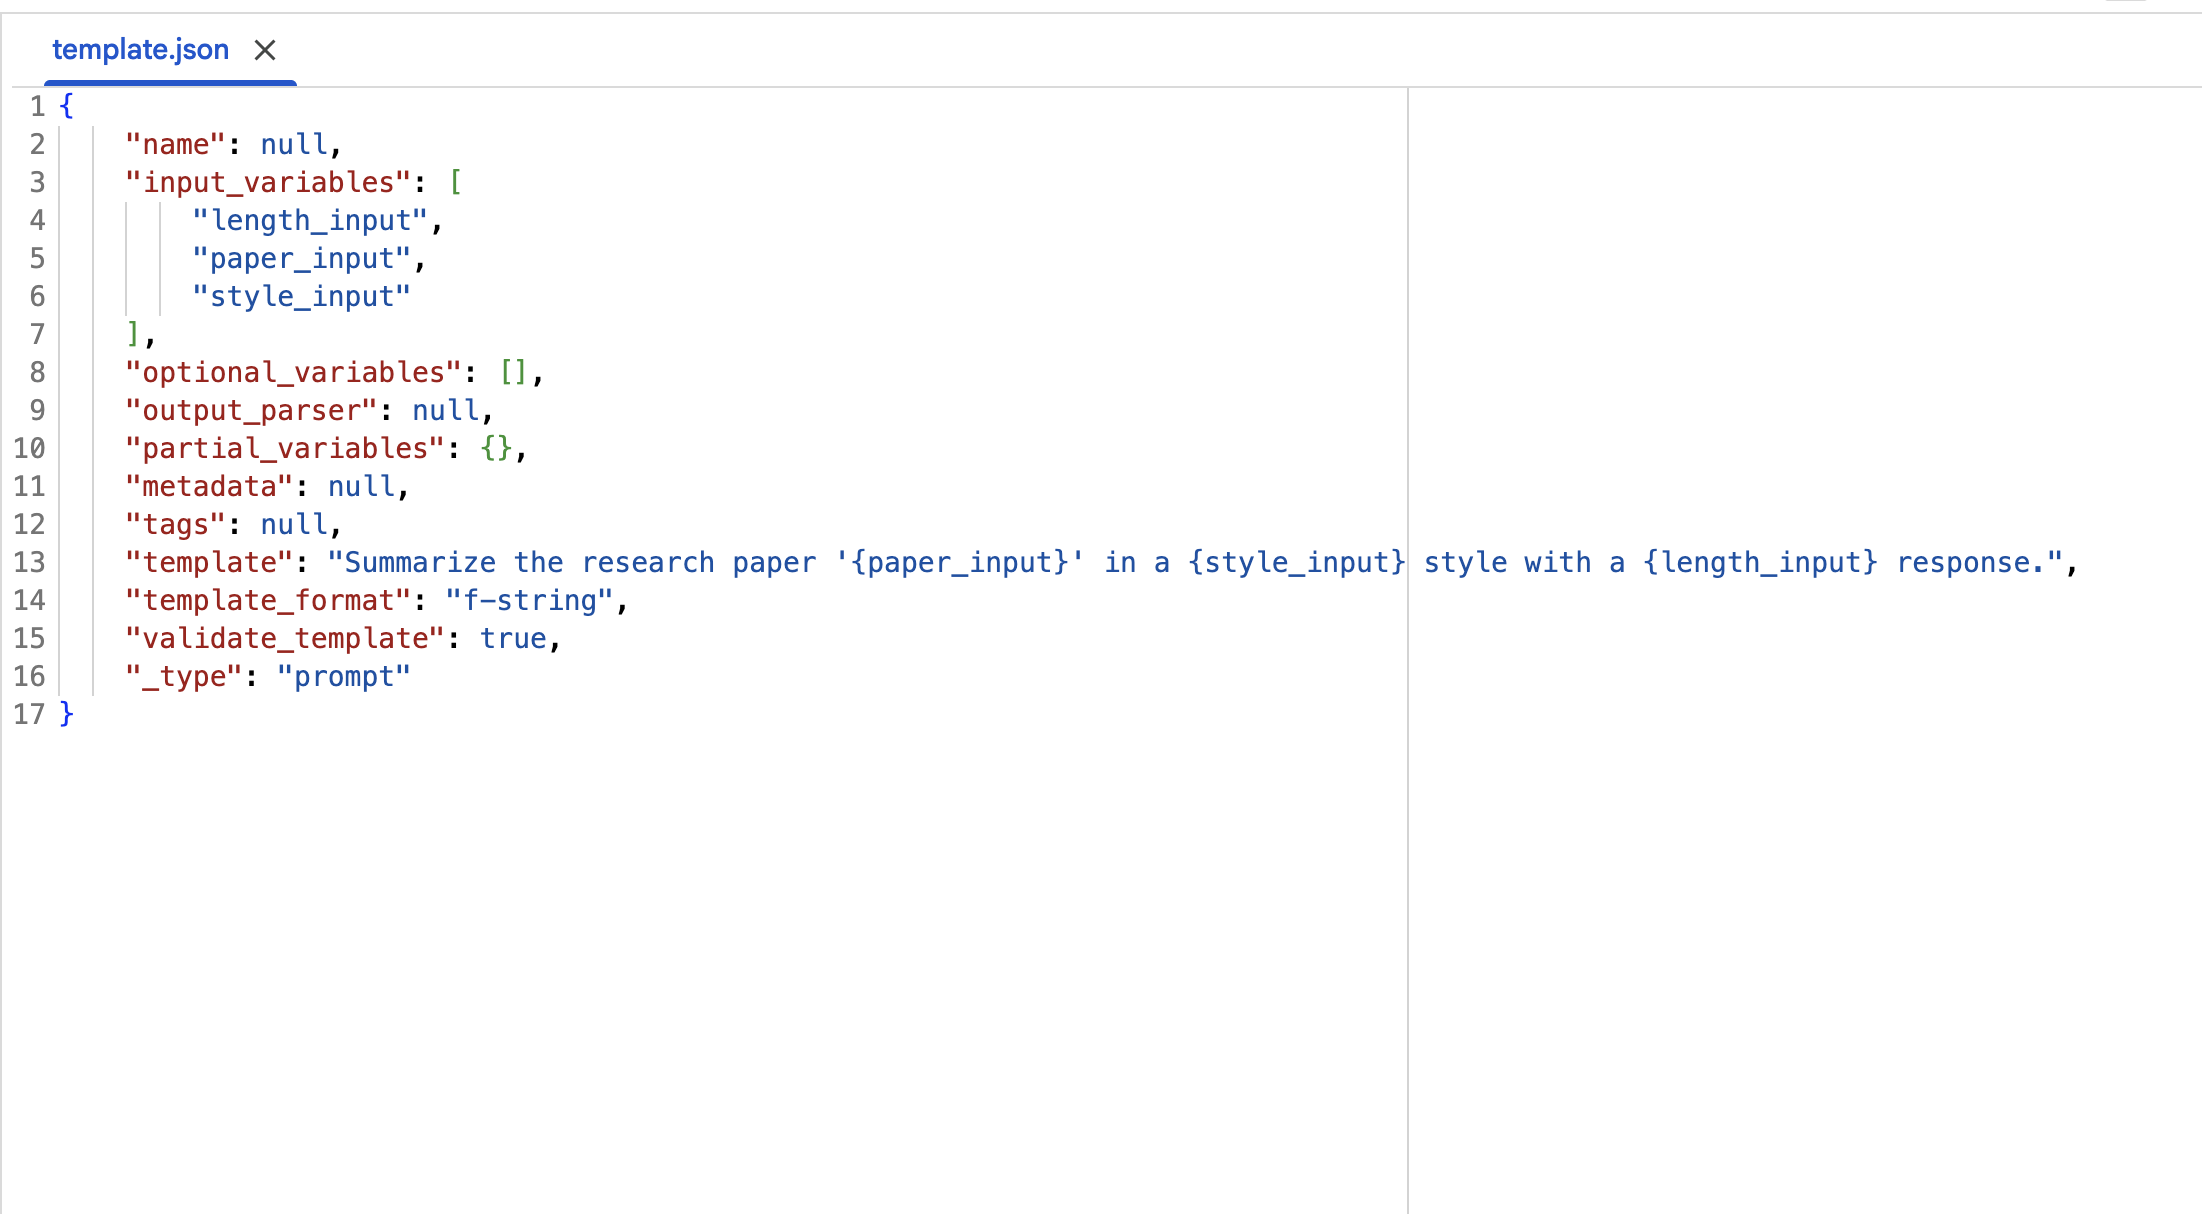

In [23]:
# Lets load the saved template file

from langchain_core.prompts import load_prompt

template_v3 = load_prompt('template.json')
prompt_v3 = template_v3.invoke({
    "paper_input": paper_input.value,
    "style_input": style_input.value,
    "length_input": length_input.value
})

result = llm.invoke(prompt_v3)
print(result.content)

The research paper 'Attention is all you need' introduces a new model for machine translation called the Transformer. The conventional models relied on recurrent neural networks or convolutional neural networks, which aren't perfect for understanding the complex relationships in sentences. 

To fix these issues, the researchers came up with the idea of attention mechanisms which let the model focus on different parts of the input when producing each word of the output, allowing translation to be more accurate overall.

The Transformer model only uses attention and does away with the sequential nature of old models. This makes it more parallelizable and faster to train. In tests, it outperformed old models on translating between English and German and English and French. So, in simple words, the Transformer is a more efficient and accurate way to translate text using machine learning algorithms.


Using the prompt from the saved JSON, we were able to invoke the LLM.